# Efeitos adversos
## Objetivos:
- Ver quais foram os grupos de pessoas mais afetados por efeitos adversos
- Conseguir prever se novos pacientes terão esses efeitos
## Observações:
- idade, peso e comorbidade são as minhas variáveis preditoras
- efeito_adverso é a minha variável alvo

In [1]:
# Importando as bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv("/efeito_adverso_de_remedios.csv")
novos_pacientes = pd.read_csv("/novos_pacientes.csv")

In [2]:
# Criando o dataset "datasetAfetados"
datasetAfetados = dataset.loc[dataset["efeito_adverso"]=="s"]
print(datasetAfetados)

    paciente  idade  peso comorbidade efeito_adverso
1          1     56    78           s              s
2          2     48    44           n              s
3          3      5    56           n              s
4          4     56    89           s              s
5          5     13    94           s              s
6          6     28    78           n              s
12        12     78    59           s              s
14        14     35    65           n              s
16        16     91    45           n              s
18        18     65    49           n              s
23        23     30    95           n              s
24        24     80    65           s              s
25        25     45    50           n              s


In [3]:
# Média de idade e peso dos afetados
print("Média de idade dos afetados (anos): {0:.1f}".format(datasetAfetados["idade"].mean()))
print("Média de peso dos afetados (quilogramas): {0:.1f}".format(datasetAfetados["peso"].mean()))

Média de idade dos afetados (anos): 48.5
Média de peso dos afetados (quilogramas): 66.7


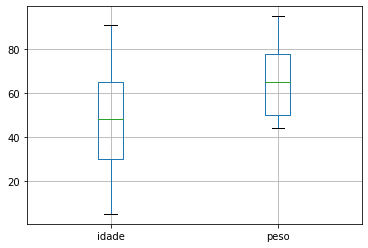

In [4]:
# Boxplot (diagrama de caixa) de idade e peso dos afetados
datasetAfetados.boxplot(column = ["idade","peso"])
plt.show()

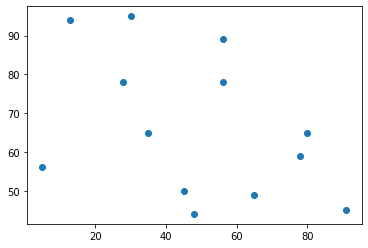

In [5]:
# Gráfico de dispersão das idades e pesos dos afetados (cada ponto equivale a uma pessoa). Isso mostra a idade e o peso das pessoas afetadas por efeitos adversos
plt.scatter(datasetAfetados["idade"],datasetAfetados["peso"])
plt.show()

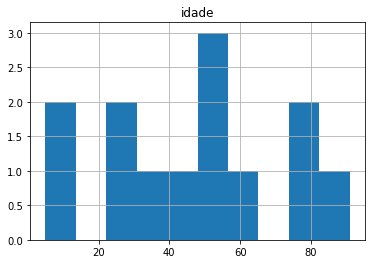

In [6]:
# Histograma das idades dos afetados. Segundo o gráfico, a faixa etária mais afetada foi de 40 a 60 anos
datasetAfetados.hist(column = 'idade', bins = 10)
plt.show()

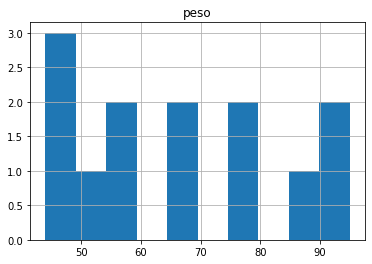

In [7]:
# Histograma dos pesos dos afetados. Segundo o gráfico, a faixa de peso mais afetada foi de 0 a 50 quilogramas
datasetAfetados.hist(column = 'peso', bins = 10)
plt.show()

In [8]:
# Porcentagem de afetados e não afetados
afetados_porcentagem = 13*100/30
nao_afetados_porcentagem = 17*100/30
print("{0:.0f}% das pessoas foram afetadas e {1:.0f}% não foram afetadas (números aproximados)".format(afetados_porcentagem,nao_afetados_porcentagem))

43% das pessoas foram afetadas e 57% não foram afetadas (números aproximados)


## Criando um modelo de machine learning para ver se novos pacientes teram ou não efeitos adversos, onde:
- sim = s = 1
- não = n = 0

In [13]:
# Criando uma cópia do dataset para fazer o modelo
datasetPrevisao = dataset

# Trocando 's' e 'n' por números
datasetPrevisao["comorbidade"] = datasetPrevisao["comorbidade"].replace("s",1)
datasetPrevisao["comorbidade"] = datasetPrevisao["comorbidade"].replace("n",0)

datasetPrevisao["efeito_adverso"] = datasetPrevisao["efeito_adverso"].replace("s",1)
datasetPrevisao["efeito_adverso"] = datasetPrevisao["efeito_adverso"].replace("n",0)
print(datasetPrevisao)

    paciente  idade  peso  comorbidade  efeito_adverso
0          0     12    34            0               0
1          1     56    78            1               1
2          2     48    44            0               1
3          3      5    56            0               1
4          4     56    89            1               1
5          5     13    94            1               1
6          6     28    78            0               1
7          7     16    99            1               0
8          8     46    54            0               0
9          9     98    65            1               0
10        10     53    89            1               0
11        11     62    44            1               0
12        12     78    59            1               1
13        13     12    50            1               0
14        14     35    65            0               1
15        15     68    48            0               0
16        16     91    45            0               1
17        

In [15]:
# Separando em variáveis preditoras e variáveis alvo
variavel_alvo = datasetPrevisao["efeito_adverso"]
variaveis_preditoras = datasetPrevisao.drop("efeito_adverso", axis = 1)
variaveis_preditoras.drop("paciente", axis = 1, inplace = True)
print(variavel_alvo.head())
print(variaveis_preditoras.head())

0    0
1    1
2    1
3    1
4    1
Name: efeito_adverso, dtype: int64
   idade  peso  comorbidade
0     12    34            0
1     56    78            1
2     48    44            0
3      5    56            0
4     56    89            1


In [16]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split
variaveis_preditoras_treino, variaveis_preditoras_teste, variavel_alvo_treino, variavel_alvo_teste = train_test_split(variaveis_preditoras, variavel_alvo, test_size = 0.3)

# A quantidade de linhas dos datasets de treino (variaveis_preditoras_treino e variavel_alvo_treino) devem ser iguais, o mesmo vale para os de teste (variaveis_preditoras_teste e variavel_alvo_teste)
print(variaveis_preditoras_treino.shape)
print(variavel_alvo_treino.shape)
print(variaveis_preditoras_teste.shape)
print(variavel_alvo_teste.shape)

(21, 3)
(21,)
(9, 3)
(9,)


In [ ]:
# Importando o algoritmo
from sklearn.ensemble import ExtraTreesClassifier
modelo = ExtraTreesClassifier()

# Treinando-o
modelo.fit(variaveis_preditoras_treino, variavel_alvo_treino)

In [29]:
# Testando-o
resultado = modelo.score(variaveis_preditoras_teste,variavel_alvo_teste)

# E mostrando sua acurácia em decimal
print("Acurácia do modelo: {0}% \n".format(resultado*100))

Acurácia do modelo: 33.33333333333333% 



## Prevendo valores com novos pacientes:

In [30]:
# Criando o dataset "novos_pacientesPrevisao"
novos_pacientesPrevisao = novos_pacientes

In [31]:
# Substitui o "s" e o "n" por 0 e 1 na coluna comorbidade de novos_pacientesPrevisao
novos_pacientesPrevisao["comorbidade"] = novos_pacientesPrevisao["comorbidade"].replace("s",1)
novos_pacientesPrevisao["comorbidade"] = novos_pacientesPrevisao["comorbidade"].replace("n",0)

# Remove a coluna paciente e efeito_adverso de novos_pacientesPrevisao
novos_pacientesPrevisao.drop("paciente", axis = 1, inplace = True)
novos_pacientesPrevisao.drop("efeito_adverso", axis = 1, inplace = True)
print(novos_pacientesPrevisao.head())

   idade  peso  comorbidade
0     89    73            0
1     90    95            0
2     44    50            1
3      7    36            1
4     37    75            1


In [32]:
# Armazena os resultados da previsão na variável resultado
resultado = modelo.predict(novos_pacientesPrevisao)

# Convertendo 0 e 1 em 'n' e 's'
resultado_lista = []
for e in resultado:
    if e == 1:
        resultado_lista.append("s")
    else:
        resultado_lista.append("n")

print("Os resultados da previsão de efeitos adversos em 5 novos pacientes foram:", resultado_lista, "\n")

Os resultados da previsão de efeitos adversos em 5 novos pacientes foram: ['n', 'n', 'n', 'n', 's'] 

